# Uncertainty 

This is a tutorial for the uncertainty module.

In [27]:
from climada.entity import ImpactFunc, ImpactFuncSet
import numpy as np
from climada.entity import BlackMarble
from climada.hazard import TropCyclone
import os
from climada.engine.uncertainty import UncVar, UncSensitivity
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def imp_fun_tc(G=1, v_half=84.7, vmin=25.7, k=3, _id=1):    
    imp_fun = ImpactFunc()
    imp_fun.haz_type = 'TC'
    imp_fun.id = _id
    imp_fun.intensity_unit = 'm/s'
    imp_fun.intensity = np.linspace(0, 150, num=100)
    imp_fun.mdd = np.repeat(1, len(imp_fun.intensity))
    imp_fun.paa = np.array([sigmoid_func(v, G, v_half, vmin, k) for v in imp_fun.intensity])
    imp_fun.check()
    impf_set = ImpactFuncSet()
    impf_set.append(imp_fun)
    return impf_set

def xhi(v, v_half, vmin):
    return max([(v - vmin), 0]) / (v_half - vmin)
  
def sigmoid_func(v, G, v_half, vmin, k):
    return G * xhi(v, v_half, vmin)**k / (1 + xhi(v, v_half, vmin)**k)

CURR_DIR = "/Users/ckropf/Documents/Climada/Uncertainty"

def dummy_exp():
    file_name = os.path.join(CURR_DIR, "exp_AIA.h5")
    exp = BlackMarble()
    exp.read_hdf5(file_name)
    return exp
    
def dummy_haz():
    file_name = os.path.join(CURR_DIR, "tc_AIA.h5")
    haz= TropCyclone()
    haz.read_hdf5(file_name)
    return haz

In [41]:
exp = dummy_exp()
haz = dummy_haz()
impf = imp_fun_tc

distr_dict = {"G": sp.stats.uniform(0.8,1),
              "v_half": sp.stats.uniform(50, 100),
              "vmin": sp.stats.uniform(15,30),
              "k": sp.stats.uniform(1, 5)
              }

impf_unc = UncVar(impf, distr_dict)

unc = UncSensitivity(exp, impf_unc, haz)
imp_sobol_dict = unc.calc_impact_sobol_sensitivity(N=10, calc_eai_exp=False, calc_at_event=False, calc_second_order=True)

2021-01-04 12:30:17,445 - climada.entity.exposures.base - INFO - Reading /Users/ckropf/Documents/Climada/Uncertainty/exp_AIA.h5
2021-01-04 12:30:17,461 - climada.hazard.base - INFO - Reading /Users/ckropf/Documents/Climada/Uncertainty/tc_AIA.h5
2021-01-04 12:30:18,228 - climada.entity.impact_funcs.base - WARNING - For intensity = 0, mdd != 0 or paa != 0. Consider shifting the origin of the intensity scale. In impact.calc the impact is always null at intensity = 0.
2021-01-04 12:30:18,229 - climada.entity.exposures.base - INFO - Matching 395 exposures with 15990 centroids.
2021-01-04 12:30:18,231 - climada.engine.impact - INFO - Calculating damage for 394 assets (>0) and 52900 events.
2021-01-04 12:30:18,380 - climada.entity.impact_funcs.base - WARNING - For intensity = 0, mdd != 0 or paa != 0. Consider shifting the origin of the intensity scale. In impact.calc the impact is always null at intensity = 0.
2021-01-04 12:30:18,381 - climada.engine.impact - INFO - Exposures matching centroi

2021-01-04 12:30:20,805 - climada.entity.impact_funcs.base - WARNING - For intensity = 0, mdd != 0 or paa != 0. Consider shifting the origin of the intensity scale. In impact.calc the impact is always null at intensity = 0.
2021-01-04 12:30:20,806 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-01-04 12:30:20,807 - climada.engine.impact - INFO - Calculating damage for 394 assets (>0) and 52900 events.
2021-01-04 12:30:20,929 - climada.entity.impact_funcs.base - WARNING - For intensity = 0, mdd != 0 or paa != 0. Consider shifting the origin of the intensity scale. In impact.calc the impact is always null at intensity = 0.
2021-01-04 12:30:20,930 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-01-04 12:30:20,931 - climada.engine.impact - INFO - Calculating damage for 394 assets (>0) and 52900 events.
2021-01-04 12:30:21,050 - climada.entity.impact_funcs.base - WARNING - For intensity = 0, mdd != 0 or paa != 0. Cons

2021-01-04 12:30:23,109 - climada.engine.impact - INFO - Calculating damage for 394 assets (>0) and 52900 events.
2021-01-04 12:30:23,220 - climada.entity.impact_funcs.base - WARNING - For intensity = 0, mdd != 0 or paa != 0. Consider shifting the origin of the intensity scale. In impact.calc the impact is always null at intensity = 0.
2021-01-04 12:30:23,221 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-01-04 12:30:23,222 - climada.engine.impact - INFO - Calculating damage for 394 assets (>0) and 52900 events.
2021-01-04 12:30:23,358 - climada.entity.impact_funcs.base - WARNING - For intensity = 0, mdd != 0 or paa != 0. Consider shifting the origin of the intensity scale. In impact.calc the impact is always null at intensity = 0.
2021-01-04 12:30:23,359 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-01-04 12:30:23,360 - climada.engine.impact - INFO - Calculating damage for 394 assets (>0) and 52900 events.
20

2021-01-04 12:30:25,581 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-01-04 12:30:25,582 - climada.engine.impact - INFO - Calculating damage for 394 assets (>0) and 52900 events.
2021-01-04 12:30:25,695 - climada.entity.impact_funcs.base - WARNING - For intensity = 0, mdd != 0 or paa != 0. Consider shifting the origin of the intensity scale. In impact.calc the impact is always null at intensity = 0.
2021-01-04 12:30:25,695 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-01-04 12:30:25,696 - climada.engine.impact - INFO - Calculating damage for 394 assets (>0) and 52900 events.
2021-01-04 12:30:25,807 - climada.entity.impact_funcs.base - WARNING - For intensity = 0, mdd != 0 or paa != 0. Consider shifting the origin of the intensity scale. In impact.calc the impact is always null at intensity = 0.
2021-01-04 12:30:25,808 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-01-04 1

2021-01-04 12:30:28,064 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-01-04 12:30:28,065 - climada.engine.impact - INFO - Calculating damage for 394 assets (>0) and 52900 events.
2021-01-04 12:30:28,177 - climada.entity.impact_funcs.base - WARNING - For intensity = 0, mdd != 0 or paa != 0. Consider shifting the origin of the intensity scale. In impact.calc the impact is always null at intensity = 0.
2021-01-04 12:30:28,178 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-01-04 12:30:28,180 - climada.engine.impact - INFO - Calculating damage for 394 assets (>0) and 52900 events.
2021-01-04 12:30:28,296 - climada.entity.impact_funcs.base - WARNING - For intensity = 0, mdd != 0 or paa != 0. Consider shifting the origin of the intensity scale. In impact.calc the impact is always null at intensity = 0.
2021-01-04 12:30:28,297 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-01-04 1

2021-01-04 12:30:30,489 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-01-04 12:30:30,490 - climada.engine.impact - INFO - Calculating damage for 394 assets (>0) and 52900 events.
2021-01-04 12:30:30,615 - climada.entity.impact_funcs.base - WARNING - For intensity = 0, mdd != 0 or paa != 0. Consider shifting the origin of the intensity scale. In impact.calc the impact is always null at intensity = 0.
2021-01-04 12:30:30,616 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-01-04 12:30:30,617 - climada.engine.impact - INFO - Calculating damage for 394 assets (>0) and 52900 events.
2021-01-04 12:30:30,735 - climada.entity.impact_funcs.base - WARNING - For intensity = 0, mdd != 0 or paa != 0. Consider shifting the origin of the intensity scale. In impact.calc the impact is always null at intensity = 0.
2021-01-04 12:30:30,736 - climada.engine.impact - INFO - Exposures matching centroids found in centr_TC
2021-01-04 1

In [69]:
S1_aai_agg = { k:list(imp_sobol_dict['aai_agg'][k]) for k in ['S1', 'S1_conf', 'ST', 'ST_conf']}

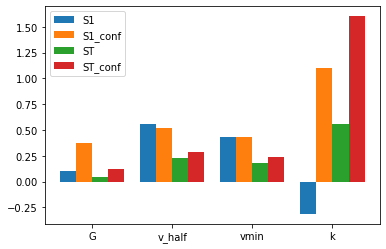

In [70]:
fig, ax = plt.subplots()
bar_plot(ax, S1_aai_agg)
plt.setp(ax, xticks=range(len(unc.params.columns.to_list())), xticklabels=unc.params.columns.to_list());

In [71]:
all_S1 = {in_var: list(imp_sobol_dict[in_var]['S1']) for in_var in imp_sobol_dict.keys()}

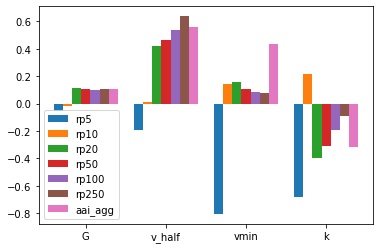

In [72]:
fig, ax = plt.subplots()
bar_plot(ax, all_S1)
plt.setp(ax, xticks=range(len(unc.params.columns.to_list())), xticklabels=unc.params.columns.to_list());

In [24]:
def bar_plot(ax, data, colors=None, total_width=0.8, single_width=1, legend=True):
    """Draws a bar plot with multiple bars per data point.
    https://stackoverflow.com/questions/14270391/python-matplotlib-multiple-bars

    Parameters
    ----------
    ax : matplotlib.pyplot.axis
        The axis we want to draw our plot on.

    data: dictionary
        A dictionary containing the data we want to plot. Keys are the names of the
        data, the items is a list of the values.

        Example:
        data = {
            "x":[1,2,3],
            "y":[1,2,3],
            "z":[1,2,3],
        }

    colors : array-like, optional
        A list of colors which are used for the bars. If None, the colors
        will be the standard matplotlib color cyle. (default: None)

    total_width : float, optional, default: 0.8
        The width of a bar group. 0.8 means that 80% of the x-axis is covered
        by bars and 20% will be spaces between the bars.

    single_width: float, optional, default: 1
        The relative width of a single bar within a group. 1 means the bars
        will touch eachother within a group, values less than 1 will make
        these bars thinner.

    legend: bool, optional, default: True
        If this is set to true, a legend will be added to the axis.
    """

    # Check if colors where provided, otherwhise use the default color cycle
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Number of bars per group
    n_bars = len(data)

    # The width of a single bar
    bar_width = total_width / n_bars

    # List containing handles for the drawn bars, used for the legend
    bars = []

    # Iterate over all data
    for i, (name, values) in enumerate(data.items()):
        # The offset in x direction of that bar
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2

        # Draw a bar for every value of that type
        for x, y in enumerate(values):
            bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color=colors[i % len(colors)])

        # Add a handle to the last drawn bar, which we'll need for the legend
        bars.append(bar[0])

    # Draw legend if we need
    if legend:
        ax.legend(bars, data.keys())